In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/sea-otter-22-02-13'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the dataset
### from:
Characterizing the oral and distal gut microbiota of the threatened southern sea otter (Enhydra lutris nereis) to enhance conservation practice.

Dudek, N.K., Switzer, A.D., Costello, E.K., Murray, M.J., Tomoleoni, J.A., Staedler, M.M., Tinker, M.T. and Relman, D.A., 2022.

Conservation science and practice, p.e12640.

https://doi.org/10.1111/csp2.12640

In [7]:
dat=ca.read_amplicon('./all.biom','./map.txt',normalize=10000,min_reads=1000)

2022-07-01 14:42:12 INFO loaded 717 samples, 34471 features
2022-07-01 14:42:12 WARNING These have metadata but do not have data - dropped (43): {'SRR14722436', 'SRR14719077', 'SRR14632605', 'SRR14632195', 'SRR14789350', 'SRR14722429', 'SRR14722432', 'SRR14632644', 'SRR14632320', 'SRR14722434', 'SRR14719074', 'SRR14632733', 'SRR14719075', 'SRR14719080', 'SRR14632548', 'SRR14722435', 'SRR14632221', 'SRR14719070', 'SRR14632858', 'SRR14789347', 'SRR14789349', 'SRR14722438', 'SRR14722439', 'SRR14632199', 'SRR14722437', 'SRR14789348', 'SRR14632241', 'SRR14632683', 'SRR14719073', 'SRR14722433', 'SRR14632237', 'SRR14719079', 'SRR14719072', 'SRR14722428', 'SRR14722431', 'SRR14719071', 'SRR14632779', 'SRR14722430', 'SRR14632688', 'SRR14719069', 'SRR14632492', 'SRR14719076', 'SRR14719078'}
2022-07-01 14:42:13 WARNING Do you forget to normalize your data? It is required before running this function
2022-07-01 14:42:13 INFO After filtering, 681 remain.


In [8]:
otter=dat.filter_samples('Host','southern_sea_otter')
otter=otter.cluster_features(10)

2022-07-01 14:42:13 INFO After filtering, 1577 remain.


# Look at gut samples

In [9]:
otter_gut=otter.filter_samples('Organism','gut metagenome')
otter_gut=otter_gut.cluster_features(10)
otter_gut

2022-07-01 14:42:14 INFO After filtering, 648 remain.


AmpliconExperiment with 161 samples, 648 features

2022-07-01 14:42:14 INFO After filtering, 33 remain.
2022-07-01 14:42:14 INFO Getting dbBact annotations for 33 sequences, please wait...
2022-07-01 14:42:14 INFO Limited to maximal annotationid: 7345
2022-07-01 14:42:16 INFO got 1663 annotations
2022-07-01 14:42:16 WARNING ignoring 30 annotation with id > max_id 7345
2022-07-01 14:42:16 INFO Got 3079 annotation-sequence pairs
2022-07-01 14:42:16 INFO Added annotation data to experiment. Total 1633 annotations, 33 ASVs
2022-07-01 14:42:16 WARNING No experiment found matching the details [['DataMD5', 'e4e93d88978abbaf041760e3dbba6af3'], ['MapMD5', 'f02c677dd9b83c928c1d78e59eff8843']]
2022-07-01 14:42:16 WARNING No matching experiment found in dbBact. Not ignoring any experiments


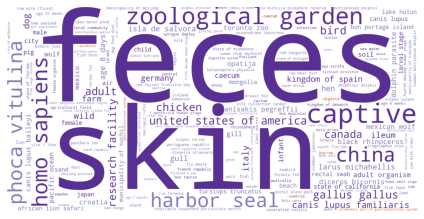

In [10]:
f=db.draw_wordcloud(otter_gut.filter_prevalence(0.3),ignore_exp=True,max_id=7345)

# Oral samples

In [11]:
otter_oral=otter.filter_samples('Organism','oral metagenome')
otter_oral=otter_oral.cluster_features(10)
otter_oral

2022-07-01 14:42:22 INFO After filtering, 592 remain.


AmpliconExperiment with 186 samples, 592 features

2022-07-01 14:42:22 INFO After filtering, 67 remain.
2022-07-01 14:42:22 INFO Getting dbBact annotations for 67 sequences, please wait...
2022-07-01 14:42:22 INFO Limited to maximal annotationid: 7345
2022-07-01 14:42:23 INFO got 315 annotations
2022-07-01 14:42:23 WARNING ignoring 5 annotation with id > max_id 7345
2022-07-01 14:42:23 INFO Got 773 annotation-sequence pairs
2022-07-01 14:42:23 INFO Added annotation data to experiment. Total 310 annotations, 67 ASVs
2022-07-01 14:42:23 WARNING No experiment found matching the details [['DataMD5', 'e4e93d88978abbaf041760e3dbba6af3'], ['MapMD5', 'f02c677dd9b83c928c1d78e59eff8843']]
2022-07-01 14:42:23 WARNING No matching experiment found in dbBact. Not ignoring any experiments


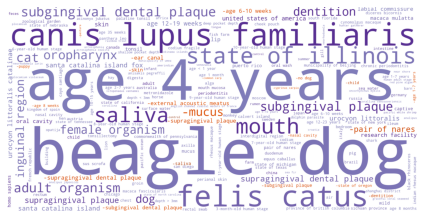

In [12]:
f=db.draw_wordcloud(otter_oral.filter_prevalence(0.3),ignore_exp=True,max_id=7345)

In [13]:
f.savefig('./fig-wordcloud-oral.pdf',dpi=600)

### Let's look at only recall and precision scores (the previous wordcloud was the combined f-score)

2022-07-01 14:42:29 INFO After filtering, 67 remain.
2022-07-01 14:42:29 INFO Getting dbBact annotations for 67 sequences, please wait...
2022-07-01 14:42:29 INFO Limited to maximal annotationid: 7345
2022-07-01 14:42:30 INFO got 315 annotations
2022-07-01 14:42:30 WARNING ignoring 5 annotation with id > max_id 7345
2022-07-01 14:42:30 INFO Got 773 annotation-sequence pairs
2022-07-01 14:42:30 INFO Added annotation data to experiment. Total 310 annotations, 67 ASVs
2022-07-01 14:42:30 WARNING No experiment found matching the details [['DataMD5', 'e4e93d88978abbaf041760e3dbba6af3'], ['MapMD5', 'f02c677dd9b83c928c1d78e59eff8843']]
2022-07-01 14:42:30 WARNING No matching experiment found in dbBact. Not ignoring any experiments


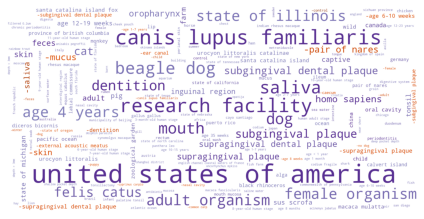

In [14]:
f=db.draw_wordcloud(otter_oral.filter_prevalence(0.3),ignore_exp=True,max_id=7345,term_type='precision')

2022-07-01 14:42:36 INFO After filtering, 67 remain.
2022-07-01 14:42:36 INFO Getting dbBact annotations for 67 sequences, please wait...
2022-07-01 14:42:36 INFO Limited to maximal annotationid: 7345
2022-07-01 14:42:36 INFO got 315 annotations
2022-07-01 14:42:36 WARNING ignoring 5 annotation with id > max_id 7345
2022-07-01 14:42:36 INFO Got 773 annotation-sequence pairs
2022-07-01 14:42:36 INFO Added annotation data to experiment. Total 310 annotations, 67 ASVs
2022-07-01 14:42:36 WARNING No experiment found matching the details [['DataMD5', 'e4e93d88978abbaf041760e3dbba6af3'], ['MapMD5', 'f02c677dd9b83c928c1d78e59eff8843']]
2022-07-01 14:42:36 WARNING No matching experiment found in dbBact. Not ignoring any experiments


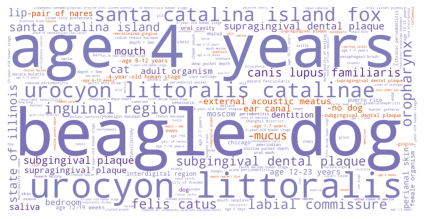

In [15]:
f=db.draw_wordcloud(otter_oral.filter_prevalence(0.3),ignore_exp=True,max_id=7345,term_type='recall')

# Let's examine the distribution of annotations from different sources

### Get all the dbBact annotations for the sea otter oral ASVs

In [16]:
tt=otter_oral.add_terms_to_features('dbbact',ignore_exp=True,max_id=7345)

2022-07-01 14:42:42 INFO Getting dbBact annotations for 592 sequences, please wait...
2022-07-01 14:42:42 INFO Limited to maximal annotationid: 7345
2022-07-01 14:42:47 INFO got 4629 annotations
2022-07-01 14:42:47 WARNING ignoring 51 annotation with id > max_id 7345
2022-07-01 14:42:47 INFO Got 21656 annotation-sequence pairs
2022-07-01 14:42:47 INFO Added annotation data to experiment. Total 4578 annotations, 592 ASVs
2022-07-01 14:42:47 WARNING No experiment found matching the details [['DataMD5', 'e4e93d88978abbaf041760e3dbba6af3'], ['MapMD5', 'f02c677dd9b83c928c1d78e59eff8843']]
2022-07-01 14:42:47 WARNING No matching experiment found in dbBact. Not ignoring any experiments


### focus on ASVs present in at least 10% of the samples

In [17]:
ttt=tt.filter_prevalence(0.1)

2022-07-01 14:43:02 INFO After filtering, 125 remain.


### Get the fraction of exp ASVs shared with each oral/non-oral annotation

In [33]:
def get_saliva_nums(exp,term, only_fecal=False):
    res=db.db.get_term_annotations(term,exp.feature_metadata.index.values,exp.databases['dbbact']['sequence_annotations'],exp.databases['dbbact']['annotations'])
    ttt=ca.Experiment(res[0].T,res[1],res[2])
#     ttt.plot(gui='qt5')
    ttt=ttt.sort_samples('expid')
    ttt.sample_metadata['oral']='no'
    ttt.sample_metadata.loc[ttt.sample_metadata['annotation'].str.contains('mouth'),'oral']='yes'
    ttt.sample_metadata.loc[ttt.sample_metadata['annotation'].str.contains('saliva'),'oral']='yes'
    ttt.sample_metadata.loc[ttt.sample_metadata['annotation'].str.contains('dentition'),'oral']='yes'
    ttt.sample_metadata.loc[ttt.sample_metadata['annotation'].str.contains('oropharynx'),'oral']='yes'
    ttt.sample_metadata.loc[ttt.sample_metadata['annotation'].str.contains('tongue'),'oral']='yes'
    if only_fecal:
        ttt.sample_metadata.loc[ttt.sample_metadata['annotation'].str.contains('feces'),'oral']='feces'
        
    print('term %s for %d features' % (term, len(exp.feature_metadata)))
    qq=ttt.filter_samples('oral','yes')
    num1=(np.sum(qq.get_data(sparse=False)>0,axis=1))
    print('found %d annotations for oral' % len(num1))
    if only_fecal:
        qq=ttt.filter_samples('oral','feces')
    else:
        qq=ttt.filter_samples('oral','no')
    num2=(np.sum(qq.get_data(sparse=False)>0,axis=1))
    print('found %d annotations for non-oral' % len(num2))
    return num1/len(exp.feature_metadata), num2/len(exp.feature_metadata)

### Get the fraction of oran and non-oral ASVs for:

In [34]:
# dog
# note for the dog we take oral vs. fecal, as some annotations (inguinal region) resemble saliva
n1,n2=get_saliva_nums(ttt, 'canis lupus familiaris',only_fecal=True)

term canis lupus familiaris for 125 features
found 19 annotations for oral
found 77 annotations for non-oral


In [35]:
# human
nh1,nh2=get_saliva_nums(ttt, 'homo sapiens')

term homo sapiens for 125 features
found 300 annotations for oral
found 987 annotations for non-oral


In [36]:
# fish :)
nf1,nf2=get_saliva_nums(ttt, 'fish')

term fish for 125 features
found 2 annotations for oral
found 55 annotations for non-oral


In [37]:
# cat
nc1,nc2=get_saliva_nums(ttt, 'felis catus')

term felis catus for 125 features
found 8 annotations for oral
found 27 annotations for non-oral


In [38]:
# mouse
nm1,nm2=get_saliva_nums(ttt, 'mus musculus')

term mus musculus for 125 features
found 8 annotations for oral
found 129 annotations for non-oral


### And plot the violin plot + scatter with some x noise to see all points

In [39]:
def vioscatter(dat):
    ''' Plot the points in dat with a bit of jitter on the x coordinate (to show even when overlapping y)
    Parameters
    ----------
    dat: array of arrays
        the y values for each category
    '''
    for idx,cdat in enumerate(dat):
        xpos=idx+np.random.randn(len(cdat))*0.05
        plt.plot(xpos,cdat,'.')

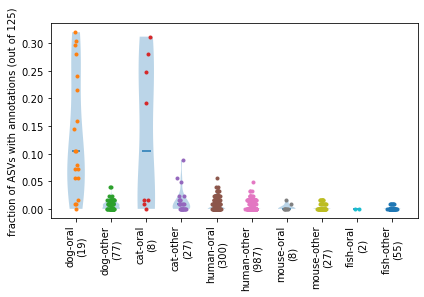

In [40]:
f=plt.figure()
labels=['dog-oral\n(%d)' % len(n1),'dog-other\n(%d)' % len(n2),'cat-oral\n(%d)' % len(nc1),'cat-other\n(%d)' % len(nc2),'human-oral\n(%d)' % len(nh1),'human-other\n(%d)' % len(nh2),'mouse-oral\n(%d)' % len(nc1),'mouse-other\n(%d)' % len(nc2),'fish-oral\n(%d)' % len(nf1),'fish-other\n(%d)' % len(nf2)]
plt.violinplot([n1,n2,nc1,nc2,nh1,nh2,nm1,nm2,nf1,nf2],showmedians=True,showextrema=False,positions=np.arange(len(labels)))
vioscatter([n1,n2,nc1,nc2,nh1,nh2,nm1,nm2,nf1,nf2])
ax=plt.gca()
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=90)
_=plt.ylabel('fraction of ASVs with annotations (out of %d)' % len(ttt.feature_metadata))
plt.tight_layout()
f.savefig('./fig-hist-annotations.pdf')

### and some statistics

In [31]:
scipy.stats.mannwhitneyu(n1,n2)

MannwhitneyuResult(statistic=226.0, pvalue=7.718607269673856e-09)

In [32]:
scipy.stats.mannwhitneyu(n1,nh1)

MannwhitneyuResult(statistic=466.5, pvalue=1.3612130884982784e-11)

In [33]:
scipy.stats.mannwhitneyu(n1,nh2)

MannwhitneyuResult(statistic=968.5, pvalue=1.93820966529662e-22)